In [1]:
#Imports
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import re

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### SPARKSQL

In [2]:
#Inportamos pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace,col

In [3]:
#Creamos la conexión con spark
spark = SparkSession.builder.master("local").appName("SQL").getOrCreate()

#Cargamos el dataset
datos_csv = '../TFM/csv_bigdata/datos_filtrados.csv'

#Pasamos los datos a un dataframe en pandas
spkTimeDF = spark.read.csv(datos_csv,sep=";",inferSchema=True, header=True)

In [4]:
spkTimeDF.createOrReplaceTempView("tiempo")

#Realizamos la siguiente consulta
query_time = "SELECT\
            to_date(fecha,'yyyy-mm-dd') as fecha,\
            dia_semana,hora,id_tramo,des_tramo,estado \
            FROM tiempo order by 1"

#Mostramos los resultados 
df_spark = spark.sql(query_time)
df_spark = df_spark.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0')) #modificamos los segundos a 00
df_spark.show(10)

+----------+----------+--------+--------+--------------------+------+
|     fecha|dia_semana|    hora|id_tramo|           des_tramo|estado|
+----------+----------+--------+--------+--------------------+------+
|2015-01-01|    Jueves|00:15:00|    A102|      ERNESTO FERRER|    37|
|2015-01-01|    Jueves|00:15:00|    A104|       EUGENIA VIÑES|    33|
|2015-01-01|    Jueves|00:15:00|    A124|   GUILLEM DE CASTRO|   139|
|2015-01-01|    Jueves|00:15:00|    A127|   GUILLEM DE CASTRO|   187|
|2015-01-01|    Jueves|00:15:00|    A122|GRAN VIA RAMON Y ...|   218|
|2015-01-01|    Jueves|00:15:00|     A13|            ALBORAIA|    40|
|2015-01-01|    Jueves|00:15:00|    A130|       HERNAN CORTES|    55|
|2015-01-01|    Jueves|00:15:00|    A131|   ISABEL DE VILLENA|    16|
|2015-01-01|    Jueves|00:15:00|    A132|  ISABEL LA CATOLICA|    18|
|2015-01-01|    Jueves|00:15:00|    A133|      ISLAS CANARIAS|    49|
+----------+----------+--------+--------+--------------------+------+
only showing top 10 

### Enero 2015

In [5]:
#Filtramos por Enero 2015
query_time_enero = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-01-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-01-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_enero = spark.sql(query_time_enero)
df_spark_enero = df_spark_enero.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [6]:
df_enero = df_spark_enero.toPandas()
df_enero.head(10)

,fecha,dia_semana,hora,media
0,2015-01-01,Jueves,10:15:00,247.608479
1,2015-01-01,Jueves,23:45:00,253.660891
2,2015-01-01,Jueves,06:45:00,279.140000
3,2015-01-01,Jueves,13:15:00,631.155941
4,2015-01-01,Jueves,23:30:00,259.184080
5,2015-01-01,Jueves,01:45:00,646.247525
6,2015-01-01,Jueves,07:15:00,287.309045
7,2015-01-01,Jueves,04:45:00,339.826633
8,2015-01-01,Jueves,10:30:00,242.167500
9,2015-01-01,Jueves,02:30:00,530.455446


In [7]:
df_max_tiempo_enero = df_enero.nlargest(10, ['media']) 
df_max_tiempo_enero

,fecha,dia_semana,hora,media
1941,2015-01-26,Lunes,09:15:00,1722.587654
1418,2015-01-19,Lunes,09:00:00,1712.360494
2149,2015-01-29,Jueves,09:15:00,1699.435644
2000,2015-01-27,Martes,09:15:00,1697.755556
2108,2015-01-28,Miércoles,09:15:00,1690.923457
2239,2015-01-30,Viernes,09:15:00,1689.311881
528,2015-01-06,Martes,09:15:00,1688.455446
1477,2015-01-19,Lunes,09:15:00,1675.098765
1595,2015-01-21,Miércoles,09:15:00,1674.618812
1110,2015-01-14,Miércoles,09:15:00,1674.580247


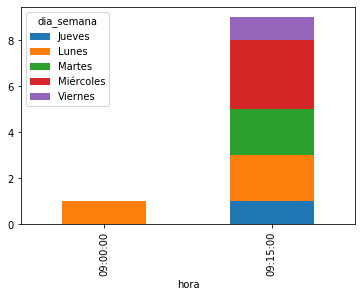

In [8]:
df_max_tiempo_enero.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Febrero 2015

In [9]:
#Filtramos por Febrero 2015
query_time_febrero = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-02-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-02-28'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_febrero = spark.sql(query_time_febrero)
df_spark_febrero = df_spark_febrero.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [10]:
df_febrero = df_spark_febrero.toPandas()
df_febrero.head(10)

,fecha,dia_semana,hora,media
0,2015-02-01,Domingo,20:00:00,1286.213400
1,2015-02-01,Domingo,02:30:00,70.478723
2,2015-02-01,Domingo,14:30:00,1459.365432
3,2015-02-01,Domingo,22:00:00,892.133663
4,2015-02-01,Domingo,03:45:00,50.532609
5,2015-02-01,Domingo,07:30:00,502.806452
6,2015-02-01,Domingo,18:30:00,1345.713580
7,2015-02-01,Domingo,16:30:00,1030.896296
8,2015-02-01,Domingo,21:30:00,1084.444444
9,2015-02-01,Domingo,18:45:00,1350.298765


In [11]:
df_max_tiempo_febrero = df_febrero.nlargest(10, ['media']) 
df_max_tiempo_febrero

,fecha,dia_semana,hora,media
1304,2015-02-16,Lunes,09:15:00,1735.311111
1435,2015-02-17,Martes,09:15:00,1715.323457
1498,2015-02-18,Miércoles,09:15:00,1702.585185
2054,2015-02-24,Martes,09:15:00,1701.935802
2178,2015-02-25,Miércoles,09:15:00,1697.804938
1036,2015-02-13,Viernes,09:15:00,1689.738272
2361,2015-02-27,Viernes,09:15:00,1687.708642
1940,2015-02-23,Lunes,09:15:00,1685.512376
1587,2015-02-19,Jueves,09:15:00,1681.276543
159,2015-02-03,Martes,09:15:00,1681.175439


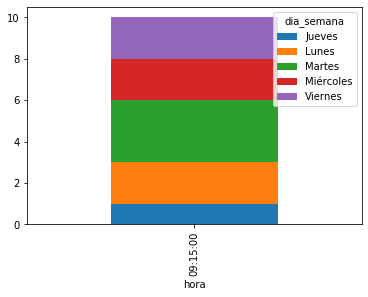

In [12]:
df_max_tiempo_febrero.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Marzo 2015

In [13]:
#Filtramos por Marzo 2015
query_time_marzo = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-03-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-03-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_marzo = spark.sql(query_time_marzo)
df_spark_marzo = df_spark_marzo.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [14]:
df_marzo = df_spark_marzo.toPandas()
df_marzo.head(10)

,fecha,dia_semana,hora,media
0,2015-03-01,Domingo,14:45:00,1135.088889
1,2015-03-01,Domingo,03:45:00,133.780856
2,2015-03-01,Domingo,19:15:00,1228.007426
3,2015-03-01,Domingo,21:30:00,1164.462871
4,2015-03-01,Domingo,01:45:00,268.266332
5,2015-03-01,Domingo,14:00:00,1256.145679
6,2015-03-01,Domingo,02:45:00,196.863636
7,2015-03-01,Domingo,08:15:00,320.715347
8,2015-03-01,Domingo,16:15:00,730.198020
9,2015-03-01,Domingo,09:15:00,455.853598


In [15]:
df_max_tiempo_marzo = df_marzo.nlargest(10, ['media']) 
df_max_tiempo_marzo

,fecha,dia_semana,hora,media
804,2015-03-11,Miércoles,09:15:00,1697.874074
2152,2015-03-25,Miércoles,09:15:00,1692.068966
233,2015-03-03,Martes,09:15:00,1689.777778
512,2015-03-06,Viernes,09:15:00,1687.344059
101,2015-03-02,Lunes,09:15:00,1676.335802
2585,2015-03-30,Lunes,09:15:00,1672.445813
583,2015-03-07,Sábado,14:45:00,1667.826303
2741,2015-03-31,Martes,09:00:00,1666.551724
2659,2015-03-31,Martes,09:15:00,1662.000000
2295,2015-03-27,Viernes,09:15:00,1657.725926


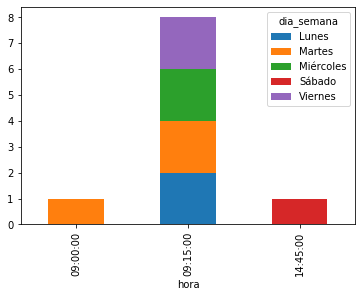

In [16]:
df_max_tiempo_marzo.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Abril 2015

In [17]:
#Filtramos por Abril 2015
query_time_abril = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-04-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-04-30'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_abril = spark.sql(query_time_abril)
df_spark_abril = df_spark_abril.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [18]:
df_abril = df_spark_abril.toPandas()
df_abril.head(10)

,fecha,dia_semana,hora,media
0,2015-04-01,Miércoles,07:45:00,160.640000
1,2015-04-01,Miércoles,02:45:00,280.882206
2,2015-04-01,Miércoles,00:15:00,428.481390
3,2015-04-01,Miércoles,18:45:00,998.081886
4,2015-04-01,Miércoles,16:15:00,892.679012
5,2015-04-01,Miércoles,19:45:00,1306.804938
6,2015-04-01,Miércoles,20:30:00,1148.547030
7,2015-04-01,Miércoles,15:30:00,731.372840
8,2015-04-01,Miércoles,05:45:00,139.623410
9,2015-04-01,Miércoles,12:15:00,160.640000


In [19]:
df_max_tiempo_abril = df_abril.nlargest(10, ['media']) 
df_max_tiempo_abril

,fecha,dia_semana,hora,media
823,2015-04-11,Sábado,09:15:00,1706.841975
1573,2015-04-20,Lunes,09:15:00,1702.495050
200,2015-04-03,Viernes,09:15:00,1698.249383
2538,2015-04-30,Jueves,09:15:00,1694.274752
109,2015-04-02,Jueves,09:15:00,1692.701235
367,2015-04-05,Domingo,09:15:00,1685.982673
1270,2015-04-16,Jueves,09:15:00,1685.407407
2296,2015-04-27,Lunes,09:15:00,1682.472772
1169,2015-04-15,Miércoles,09:15:00,1681.730864
2424,2015-04-29,Miércoles,09:15:00,1679.702970


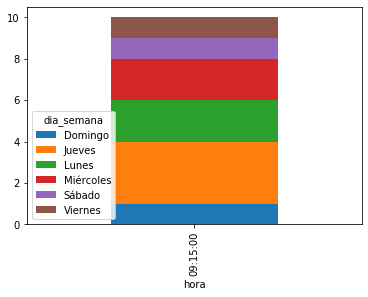

In [20]:
df_max_tiempo_abril.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Mayo 2015

In [21]:
#Filtramos por Mayo 2015
query_time_mayo = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-05-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-05-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_mayo = spark.sql(query_time_mayo)
df_spark_mayo = df_spark_mayo.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [22]:
df_mayo = df_spark_mayo.toPandas()
df_mayo.head(10)

,fecha,dia_semana,hora,media
0,2015-05-01,Viernes,17:30:00,1175.400000
1,2015-05-01,Viernes,13:15:00,1401.760494
2,2015-05-01,Viernes,01:45:00,157.199005
3,2015-05-01,Viernes,04:15:00,63.246787
4,2015-05-01,Viernes,05:30:00,110.236641
5,2015-05-01,Viernes,16:00:00,1006.869136
6,2015-05-01,Viernes,08:15:00,847.708642
7,2015-05-01,Viernes,04:00:00,61.981865
8,2015-05-01,Viernes,07:45:00,740.017327
9,2015-05-01,Viernes,21:30:00,1046.556931


In [23]:
df_max_tiempo_mayo = df_mayo.nlargest(10, ['media']) 
df_max_tiempo_mayo

,fecha,dia_semana,hora,media
116,2015-05-02,Sábado,09:15:00,1710.891358
772,2015-05-11,Lunes,09:15:00,1702.765432
198,2015-05-03,Domingo,09:15:00,1690.506173
1403,2015-05-18,Lunes,09:15:00,1686.099010
1540,2015-05-19,Martes,09:15:00,1677.254950
1654,2015-05-21,Jueves,09:15:00,1676.950495
1596,2015-05-20,Miércoles,09:15:00,1676.742574
1101,2015-05-15,Viernes,09:15:00,1675.281407
1049,2015-05-14,Jueves,09:15:00,1671.376238
501,2015-05-06,Miércoles,14:45:00,1668.346535


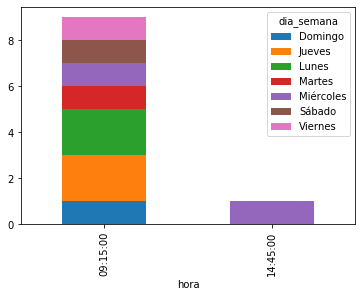

In [24]:
df_max_tiempo_mayo.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Junio 2015

In [25]:
#Filtramos por Junio 2015
query_time_junio = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-06-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-06-30'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_junio = spark.sql(query_time_junio)
df_spark_junio = df_spark_junio.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [26]:
df_junio = df_spark_junio.toPandas()
df_junio.head(10)

,fecha,dia_semana,hora,media
0,2015-06-01,Lunes,08:45:00,178.067500
1,2015-06-01,Lunes,17:30:00,941.856790
2,2015-06-01,Lunes,07:30:00,158.073980
3,2015-06-01,Lunes,20:45:00,920.811881
4,2015-06-01,Lunes,02:45:00,284.580645
5,2015-06-01,Lunes,14:00:00,1332.293827
6,2015-06-01,Lunes,16:30:00,487.813896
7,2015-06-01,Lunes,10:15:00,299.337500
8,2015-06-01,Lunes,21:00:00,894.380247
9,2015-06-01,Lunes,12:15:00,839.002488


In [27]:
df_max_tiempo_junio = df_junio.nlargest(10, ['media']) 
df_max_tiempo_junio

,fecha,dia_semana,hora,media
90,2015-06-02,Martes,14:45:00,1691.525926
107,2015-06-02,Martes,09:15:00,1680.940741
1095,2015-06-15,Lunes,09:15:00,1678.116337
176,2015-06-03,Miércoles,09:15:00,1672.501235
767,2015-06-11,Jueves,09:15:00,1672.434568
731,2015-06-11,Jueves,14:45:00,1670.511111
1213,2015-06-16,Martes,09:15:00,1669.977723
400,2015-06-05,Viernes,09:15:00,1667.346535
2159,2015-06-26,Viernes,14:45:00,1660.014851
1357,2015-06-17,Miércoles,09:15:00,1658.935644


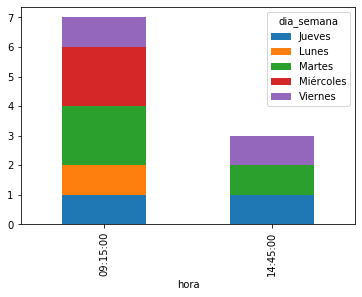

In [28]:
df_max_tiempo_junio.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Julio 2015

In [29]:
#Filtramos por Julio 2015
query_time_julio = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-07-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-07-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_julio = spark.sql(query_time_julio)
df_spark_julio = df_spark_julio.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [30]:
df_julio = df_spark_julio.toPandas()
df_julio.head(10)

,fecha,dia_semana,hora,media
0,2015-07-01,Miércoles,21:45:00,992.000000
1,2015-07-01,Miércoles,22:45:00,560.562963
2,2015-07-01,Miércoles,19:15:00,1474.888614
3,2015-07-01,Miércoles,11:15:00,1065.141089
4,2015-07-01,Miércoles,12:15:00,1148.878713
5,2015-07-01,Miércoles,08:15:00,1419.267327
6,2015-07-01,Miércoles,08:45:00,1432.301235
7,2015-07-01,Miércoles,18:30:00,1383.313580
8,2015-07-01,Miércoles,14:15:00,1375.775309
9,2015-07-01,Miércoles,14:30:00,1500.012346


In [31]:
df_max_tiempo_julio = df_julio.nlargest(10, ['media']) 
df_max_tiempo_julio

,fecha,dia_semana,hora,media
368,2015-07-05,Domingo,09:15:00,1664.178218
1252,2015-07-17,Viernes,14:45:00,1611.863524
1936,2015-07-24,Viernes,14:45:00,1596.337469
734,2015-07-10,Viernes,19:45:00,1590.622222
354,2015-07-05,Domingo,09:00:00,1579.421836
404,2015-07-05,Domingo,09:30:00,1574.378713
2633,2015-07-31,Viernes,14:45:00,1568.064516
363,2015-07-05,Domingo,08:15:00,1551.717822
694,2015-07-10,Viernes,19:15:00,1545.730864
696,2015-07-10,Viernes,14:45:00,1543.365432


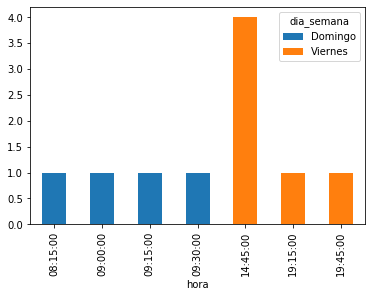

In [32]:
df_max_tiempo_julio.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Agosto 2015

In [33]:
#Filtramos por Agosto 2015
query_time_agosto = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-08-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-08-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_agosto = spark.sql(query_time_agosto)
df_spark_agosto = df_spark_agosto.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [34]:
df_agosto = df_spark_agosto.toPandas()
df_agosto.head(10)

,fecha,dia_semana,hora,media
0,2015-08-01,Sábado,17:30:00,1438.617284
1,2015-08-01,Sábado,20:15:00,1330.054321
2,2015-08-01,Sábado,18:15:00,1372.610422
3,2015-08-01,Sábado,01:15:00,147.685279
4,2015-08-01,Sábado,04:45:00,52.054688
5,2015-08-01,Sábado,17:45:00,1467.185185
6,2015-08-01,Sábado,10:45:00,1057.624691
7,2015-08-01,Sábado,11:30:00,1090.106173
8,2015-08-01,Sábado,03:45:00,49.291005
9,2015-08-01,Sábado,05:45:00,131.903308


In [35]:
df_max_tiempo_agosto = df_agosto.nlargest(10, ['media']) 
df_max_tiempo_agosto

,fecha,dia_semana,hora,media
387,2015-08-05,Miércoles,09:15:00,1665.257576
489,2015-08-06,Jueves,09:15:00,1663.920792
42,2015-08-01,Sábado,09:15:00,1633.807407
431,2015-08-05,Miércoles,14:45:00,1627.879397
778,2015-08-10,Lunes,08:15:00,1604.903465
818,2015-08-10,Lunes,19:45:00,1602.269136
812,2015-08-10,Lunes,14:45:00,1600.281481
765,2015-08-10,Lunes,18:45:00,1583.649383
517,2015-08-06,Jueves,09:00:00,1577.655941
833,2015-08-10,Lunes,19:30:00,1577.372840


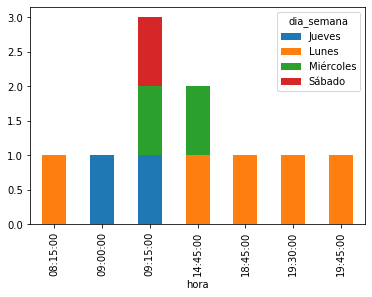

In [36]:
df_max_tiempo_agosto.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Septiembre 2015

In [37]:
#Filtramos por Septiembre 2015
query_time_septiembre = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-09-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-09-30'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_septiembre = spark.sql(query_time_septiembre)
df_spark_septiembre = df_spark_septiembre.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [38]:
df_septiembre = df_spark_septiembre.toPandas()
df_septiembre.head(10)

,fecha,dia_semana,hora,media
0,2015-09-01,Martes,00:00:00,256.711779
1,2015-09-01,Martes,08:30:00,1441.475248
2,2015-09-01,Martes,22:15:00,742.604938
3,2015-09-01,Martes,12:15:00,1195.089109
4,2015-09-01,Martes,20:15:00,1400.837037
5,2015-09-01,Martes,09:30:00,1441.475248
6,2015-09-01,Martes,20:45:00,1369.167901
7,2015-09-01,Martes,16:15:00,1182.503704
8,2015-09-01,Martes,19:30:00,1475.614815
9,2015-09-01,Martes,11:15:00,1096.083951


In [39]:
df_max_tiempo_septiembre = df_septiembre.where(df_septiembre['media'] < 3256.5).nlargest(10, ['media']) 
df_max_tiempo_septiembre

,fecha,dia_semana,hora,media
117,2015-09-02,Miércoles,09:15:00,1731.076543
1189,2015-09-25,Viernes,14:45:00,1696.029703
881,2015-09-11,Viernes,09:15:00,1694.328395
1231,2015-09-30,Miércoles,09:15:00,1687.432099
1029,2015-09-14,Lunes,09:15:00,1667.288889
857,2015-09-11,Viernes,08:15:00,1662.873134
1044,2015-09-15,Martes,09:15:00,1662.506173
1113,2015-09-17,Jueves,09:15:00,1658.429630
875,2015-09-11,Viernes,08:30:00,1658.258706
1220,2015-09-29,Martes,08:30:00,1648.175309


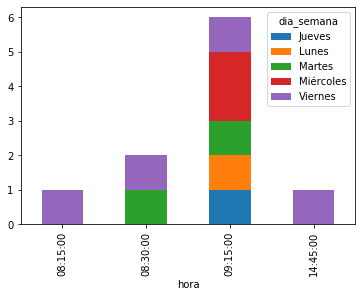

In [40]:
df_max_tiempo_septiembre.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Octubre 2015

In [41]:
#Filtramos por Octubre 2015
query_time_octubre = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-10-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-10-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_octubre = spark.sql(query_time_octubre)
df_spark_octubre = df_spark_octubre.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [42]:
df_octubre = df_spark_octubre.toPandas()
df_octubre.head(10)

,fecha,dia_semana,hora,media
0,2015-10-01,Jueves,11:45:00,1030.725926
1,2015-10-01,Jueves,00:15:00,413.273632
2,2015-10-01,Jueves,16:45:00,801.143210
3,2015-10-01,Jueves,01:45:00,305.897243
4,2015-10-01,Jueves,07:15:00,231.603491
5,2015-10-01,Jueves,07:30:00,246.366584
6,2015-10-01,Jueves,15:15:00,797.086634
7,2015-10-01,Jueves,19:00:00,1158.913580
8,2015-10-01,Jueves,11:15:00,938.624691
9,2015-10-01,Jueves,12:45:00,1129.987654


In [43]:
df_max_tiempo_octubre = df_octubre.where(df_octubre['media'] < 3256.5).nlargest(10, ['media']) 
df_max_tiempo_octubre

,fecha,dia_semana,hora,media
1775,2015-10-21,Miércoles,09:15:00,1737.155556
1704,2015-10-20,Martes,09:15:00,1706.797030
149,2015-10-02,Viernes,09:15:00,1704.780247
1156,2015-10-14,Miércoles,09:15:00,1703.348148
2317,2015-10-27,Martes,09:15:00,1693.619753
533,2015-10-06,Martes,09:15:00,1689.076733
1308,2015-10-16,Viernes,14:45:00,1688.439506
1876,2015-10-22,Jueves,09:15:00,1683.254321
2509,2015-10-29,Jueves,09:15:00,1681.953086
2316,2015-10-27,Martes,08:15:00,1679.928395


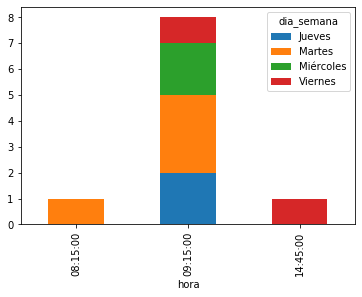

In [44]:
df_max_tiempo_octubre.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Noviembre 2015

In [45]:
#Filtramos por Noviembre 2015
query_time_noviembre = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-11-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-11-30'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_noviembre = spark.sql(query_time_noviembre)
df_spark_noviembre = df_spark_noviembre.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [46]:
df_noviembre = df_spark_noviembre.toPandas()
df_noviembre.head(10)

,fecha,dia_semana,hora,media
0,2015-11-01,Domingo,04:00:00,206.282116
1,2015-11-01,Domingo,14:15:00,1077.629630
2,2015-11-01,Domingo,20:00:00,956.758025
3,2015-11-01,Domingo,05:45:00,142.892583
4,2015-11-01,Domingo,15:30:00,572.752475
5,2015-11-01,Domingo,16:45:00,746.467822
6,2015-11-01,Domingo,17:00:00,791.750617
7,2015-11-01,Domingo,16:15:00,629.235732
8,2015-11-01,Domingo,03:00:00,272.516291
9,2015-11-01,Domingo,19:00:00,1017.493827


In [47]:
df_max_tiempo_noviembre = df_noviembre.where(df_noviembre['media'] < 3256.5).nlargest(10, ['media']) 
df_max_tiempo_noviembre

,fecha,dia_semana,hora,media
2044,2015-11-23,Lunes,09:15:00,1726.187654
176,2015-11-02,Lunes,09:15:00,1705.540741
1345,2015-11-16,Lunes,09:15:00,1697.325926
2661,2015-11-30,Lunes,09:15:00,1695.338272
1607,2015-11-19,Jueves,09:30:00,1694.777228
1651,2015-11-19,Jueves,09:15:00,1694.777228
2119,2015-11-24,Martes,09:15:00,1675.738462
500,2015-11-06,Viernes,09:15:00,1674.373762
210,2015-11-03,Martes,09:15:00,1672.009901
2397,2015-11-27,Viernes,14:45:00,1667.335802


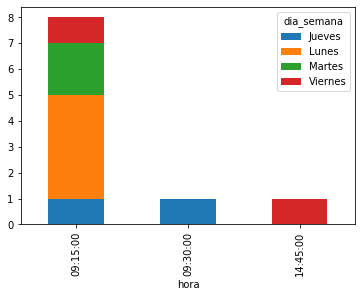

In [48]:
df_max_tiempo_noviembre.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Diciembre 2015

In [49]:
#Filtramos por Diciembre 2015
query_time_diciembre = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-12-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-12-31'\
                    group by fecha,dia_semana,hora\
                    order by 1"

df_spark_diciembre = spark.sql(query_time_diciembre)
df_spark_diciembre = df_spark_diciembre.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [50]:
df_diciembre = df_spark_diciembre.toPandas()
df_diciembre.head(10)

,fecha,dia_semana,hora,media
0,2015-12-01,Martes,09:15:00,1618.703704
1,2015-12-01,Martes,22:15:00,571.345679
2,2015-12-01,Martes,22:30:00,566.175309
3,2015-12-01,Martes,10:45:00,1078.730864
4,2015-12-01,Martes,19:00:00,1480.646914
5,2015-12-01,Martes,20:15:00,1220.602469
6,2015-12-01,Martes,00:00:00,229.471322
7,2015-12-01,Martes,03:45:00,48.081579
8,2015-12-01,Martes,02:45:00,57.460938
9,2015-12-01,Martes,23:00:00,354.735149


In [51]:
#Obtenemos los 10 tramos con mayor volumen de tráfico en Diciembre de 2015
df_max_tiempo_diciembre = df_diciembre.where(df_diciembre['media'] < 3256.5).nlargest(10, ['media']) 
df_max_tiempo_diciembre

,fecha,dia_semana,hora,media
67,2015-12-01,Martes,09:00:00,1718.502475
1601,2015-12-18,Viernes,14:45:00,1708.624691
1834,2015-12-21,Lunes,09:15:00,1688.066998
1408,2015-12-16,Miércoles,09:15:00,1684.627160
1499,2015-12-17,Jueves,09:15:00,1675.740741
206,2015-12-03,Jueves,09:15:00,1671.140741
1292,2015-12-15,Martes,09:15:00,1670.398515
496,2015-12-06,Domingo,14:45:00,1658.292079
410,2015-12-05,Sábado,09:15:00,1657.806931
1535,2015-12-18,Viernes,15:00:00,1655.832099


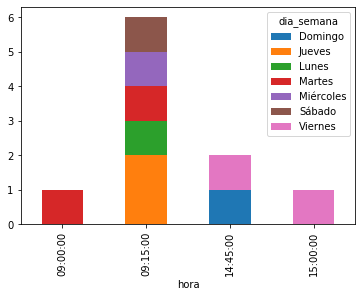

In [52]:
df_max_tiempo_diciembre.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)

### Total por Franja Horaria desde 01/2015 a 12/2015

In [5]:
#Filtramos por Año 2015
query_time_anual = "SELECT\
                    to_date(fecha,'yyyy-mm-dd') as fecha,\
                    dia_semana,\
                    hora,\
                    avg(estado) as media \
                    FROM tiempo\
                    where to_date(fecha,'yyyy-mm-dd') >= '2015-01-01'\
                    and to_date(fecha,'yyyy-mm-dd') <= '2015-12-31'\
                    group by fecha,dia_semana,hora\
                    order by 1,3"

df_spark_anual = spark.sql(query_time_anual)
df_spark_anual = df_spark_anual.withColumn('hora', regexp_replace(col('hora'), '[\d:]$', '0'))

In [6]:
df_anual = df_spark_anual.toPandas()
df_anual.head(5)

,fecha,dia_semana,hora,media
0,2015-01-01,Martes,00:00:00,256.711779
1,2015-01-01,Lunes,00:00:00,551.597015
2,2015-01-01,Martes,00:00:00,229.471322
3,2015-01-01,Domingo,00:00:00,417.270471
4,2015-01-01,Miércoles,00:15:00,428.481390


In [7]:
#Guardamos dataframe df_anual
df_anual_data = df_anual.to_csv(r'/Users/josemarti/Documents/TFM/Machine_Learning_Data/time_data/time_data.csv',sep=';', index = False, header=True)

try:
    df_anual_data
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


In [12]:
#Obtenemos los 10 tramos con mayor volumen de tráfico anual
df_max_tiempo_anual = df_anual.where(df_anual['media'] < 3256.5).nlargest(10, ['media']) 
df_max_tiempo_anual

,fecha,dia_semana,hora,media
20110,2015-01-21,Miércoles,09:15:00,1737.155556
15058,2015-01-16,Lunes,09:15:00,1735.311111
1389,2015-01-02,Miércoles,09:15:00,1731.076543
22037,2015-01-23,Lunes,09:15:00,1726.187654
24985,2015-01-26,Lunes,09:15:00,1722.587654
373,2015-01-01,Martes,09:00:00,1718.502475
16054,2015-01-17,Martes,09:15:00,1715.323457
18084,2015-01-19,Lunes,09:00:00,1712.360494
1395,2015-01-02,Sábado,09:15:00,1710.891358
17305,2015-01-18,Viernes,14:45:00,1708.624691


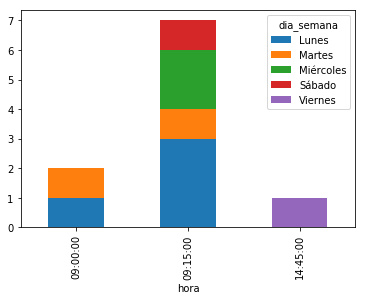

In [13]:
df_max_tiempo_anual.groupby(['hora','dia_semana']).size().unstack().plot(kind='bar',stacked=True)